In [9]:
%matplotlib inline

from time import time
from math import sqrt, floor
import numpy as np
import pandas as pd
from IPython.core.debugger import set_trace
from pandas.plotting import scatter_matrix
pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
plt.style.use = "default"

In [10]:
train = pd.read_csv("TestData3.txt", delim_whitespace=True, header=None)
labels = pd.read_csv("TrainLabel3.txt", delim_whitespace=True, header=None)
labels = labels.rename(columns={0: "label"})

In [11]:
def merge(df, labels):
    return labels.merge(df, left_index=True,right_index=True)

In [12]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000
mean,1.541,24136653.576,3.407,12253995.652,15967326.421,77979951.886,1.496,44931306.014,0.618,23393986.221,36019311.156,5570002.221,59784627.869
std,0.498,153501863.784,1.635,110037846.416,125372261.145,268189827.436,0.712,207191751.434,1.009,151179339.534,186372789.674,74438087.894,237131410.035
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000
25%,1.000,1.000,2.000,3.000,1.000,4.000,1.000,2.000,0.000,1.000,1.000,5.000,1.000
50%,2.000,3.000,3.000,4.000,4.000,5.000,1.000,3.000,0.000,2.000,1.000,7.000,1.000
75%,2.000,5.000,4.000,5.000,6.000,5.000,2.000,4.000,1.000,2.000,3.000,7.000,1.000
max,2.000,1000000000.000,7.000,1000000000.000,1000000000.000,1000000000.000,3.000,1000000000.000,7.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000


In [13]:
train.shape

(2693, 13)

In [15]:
#labels["9"].value_counts()

Looks like we have the same problem as in 1.1 - let's checkout how many huge numbers we have, the stats for the columns without them, and what we could replace them with.

In [16]:
problem_cols = []
for col in train.columns:
    if train[col].mean() < train[col].std():
        problem_cols.append(col)

In [17]:
# for each col, get all rows w./ higher than mean
errors = train[problem_cols].apply(lambda x: x[x > x.mean()])
errors.describe()

,1,3,4,5,7,8,9,10,11,12
count,65.000,33.000,43.000,210.000,121.000,935.000,63.000,97.000,15.000,161.000
mean,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1.781,1000000000.000,1000000000.000,1000000000.000,1000000000.000
std,0.000,0.000,0.000,0.000,0.000,0.929,0.000,0.000,0.000,0.000
min,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000
25%,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000
50%,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000,2.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000
75%,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000,2.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000
max,1000000000.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000,7.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000


Looks like 0 doesn't belong - lets remove it and all the error values. replace them with the mean.

In [18]:
# errors.drop(0)
# problem_cols.pop(problem_cols.index("0"))

In [19]:
train[problem_cols].apply(lambda x: x[x < x.mean()]).describe()

,1,3,4,5,7,8,9,10,11,12
count,2628.000,2660.000,2650.000,2483.000,2572.000,1758.000,2630.000,2596.000,2678.000,2532.000
mean,3.075,3.868,3.793,4.201,2.759,0.000,1.860,1.904,5.967,1.126
std,1.796,1.290,2.541,1.217,1.475,0.000,0.739,1.127,1.786,0.416
min,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000
25%,1.000,3.000,1.000,4.000,2.000,0.000,1.000,1.000,5.000,1.000
50%,3.000,4.000,4.000,5.000,2.000,0.000,2.000,1.000,7.000,1.000
75%,5.000,5.000,6.000,5.000,4.000,0.000,2.000,3.000,7.000,1.000
max,5.000,6.000,9.000,5.000,9.000,0.000,3.000,5.000,8.000,3.000


In [20]:
errors.apply(lambda x: x.dropna().value_counts() / x.dropna().shape[0])

,1,3,4,5,7,8,9,10,11,12
1.000,nan,nan,nan,nan,nan,0.459,nan,nan,nan,nan
2.000,nan,nan,nan,nan,nan,0.374,nan,nan,nan,nan
3.000,nan,nan,nan,nan,nan,0.119,nan,nan,nan,nan
4.000,nan,nan,nan,nan,nan,0.031,nan,nan,nan,nan
5.000,nan,nan,nan,nan,nan,0.011,nan,nan,nan,nan
6.000,nan,nan,nan,nan,nan,0.005,nan,nan,nan,nan
7.000,nan,nan,nan,nan,nan,0.001,nan,nan,nan,nan
1000000000.000,1.000,1.000,1.000,1.000,1.000,nan,1.000,1.000,1.000,1.000


In [21]:
for col in problem_cols:
    train_col = train[col]
    gt_mean = train_col > train_col.mean()
    new_col_mean = train_col[~gt_mean].mean()
    
    train.loc[col][gt_mean] = new_col_mean

train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000,2693.000
mean,1.541,24136653.576,3.407,12253995.652,15967326.421,77979951.886,1.496,44931306.014,0.618,23393986.221,36019311.156,5570002.221,59784627.869
std,0.498,153501863.784,1.635,110037846.416,125372261.145,268189827.436,0.712,207191751.434,1.009,151179339.534,186372789.674,74438087.894,237131410.035
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000
25%,1.000,1.000,2.000,3.000,1.000,4.000,1.000,2.000,0.000,1.000,1.000,5.000,1.000
50%,2.000,3.000,3.000,4.000,4.000,5.000,1.000,3.000,0.000,2.000,1.000,7.000,1.000
75%,2.000,5.000,4.000,5.000,6.000,5.000,2.000,4.000,1.000,2.000,3.000,7.000,1.000
max,2.000,1000000000.000,7.000,1000000000.000,1000000000.000,1000000000.000,3.000,1000000000.000,7.000,1000000000.000,1000000000.000,1000000000.000,1000000000.000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1090f8320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1093135c0>]], dtype=object)

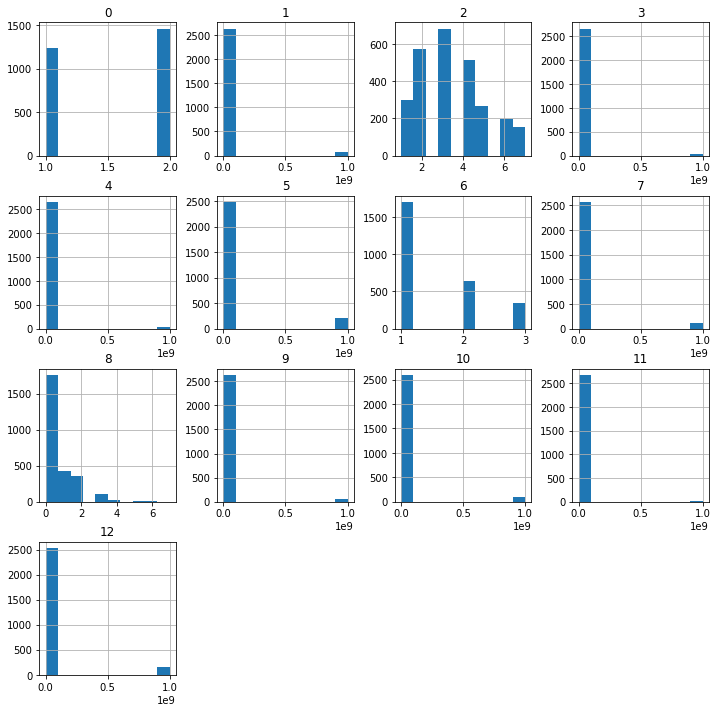

In [22]:
train.hist(figsize=(12,12))

Looks like there's a lot of the duplicated values. Lets check it out

In [23]:
train.apply(lambda x: x.value_counts())

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,nan,nan,nan,nan,nan,nan,nan,nan,1758.000,nan,nan,nan,nan
1,1237.000,942.000,300.000,106.000,855.000,66.000,1702.000,520.000,429.000,928.000,1430.000,41.000,2293.000
2,1456.000,215.000,575.000,301.000,225.000,347.000,646.000,822.000,350.000,1142.000,230.000,174.000,159.000
3,nan,279.000,681.000,563.000,198.000,203.000,345.000,475.000,111.000,560.000,798.000,255.000,80.000
4,nan,89.000,514.000,866.000,342.000,274.000,nan,452.000,29.000,nan,30.000,7.000,nan
5,nan,1103.000,269.000,515.000,167.000,1593.000,nan,200.000,10.000,nan,108.000,330.000,nan
6,nan,nan,198.000,309.000,476.000,nan,nan,53.000,5.000,nan,nan,26.000,nan
7,nan,nan,156.000,nan,91.000,nan,nan,28.000,1.000,nan,nan,1768.000,nan
8,nan,nan,nan,nan,208.000,nan,nan,12.000,nan,nan,nan,77.000,nan
9,nan,nan,nan,nan,88.000,nan,nan,10.000,nan,nan,nan,nan,nan


In [24]:
corr = train.corr()
corr

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000,-0.025,0.020,0.015,0.010,0.007,0.062,-0.023,0.074,-0.064,0.002,-0.021,-0.000
1,-0.025,1.000,-0.081,0.004,0.019,0.017,0.020,-0.022,0.060,0.024,0.035,-0.012,0.032
2,0.020,-0.081,1.000,-0.009,-0.012,-0.000,0.410,-0.025,-0.259,0.010,-0.024,0.003,0.025
3,0.015,0.004,-0.009,1.000,0.067,-0.032,-0.021,0.025,0.039,0.027,-0.003,-0.008,0.100
4,0.010,0.019,-0.012,0.067,1.000,0.040,-0.014,0.015,0.001,-0.020,0.039,0.030,-0.007
5,0.007,0.017,-0.000,-0.032,0.040,1.000,0.023,0.010,-0.003,0.056,0.011,-0.003,-0.021
6,0.062,0.020,0.410,-0.021,-0.014,0.023,1.000,-0.083,0.087,-0.025,-0.048,-0.003,-0.028
7,-0.023,-0.022,-0.025,0.025,0.015,0.010,-0.083,1.000,-0.119,0.132,0.112,0.080,0.066
8,0.074,0.060,-0.259,0.039,0.001,-0.003,0.087,-0.119,1.000,-0.036,-0.039,-0.001,-0.010
9,-0.064,0.024,0.010,0.027,-0.020,0.056,-0.025,0.132,-0.036,1.000,0.089,0.054,-0.008


In [25]:
corr[np.abs(corr) > .7 ]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan
5,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan
6,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan
7,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan
8,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan
9,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan


In [26]:
# train.plot.scatter("3", "1")

In [27]:
train = train.astype("int32")

In [29]:
train.to_csv("cleaned_train.csv")
labels.to_csv("cleaned_label.csv")

test = pd.read_csv("TestData3.txt", delim_whitespace=True, header=None)
test.to_csv('cleaned_test.csv')